In [1]:
#import Dependencies
import requests
import json
from pprint import pprint
import pandas as pd
import numpy as np
import os
import csv
import matplotlib.pyplot as plt

In [13]:
#Get Requests
query_url = 'https://api.ed.gov/data/mbk-disconnected-youth?'
api_key = 'api_key=bVIf4sU0IzjYfs473ZQEyzOjmZ5hkWeG6vdk5vPc'
per_page = 'per_page=' + '360'
full_url = query_url + api_key + "&" + per_page

DY_data = requests.get(full_url).json()

#pprint(DY_data)

In [3]:
#length
length = len(DY_data['resources'])

In [4]:
#collect data for list
percentage=[]
year=[]
race=[]
sex=[]
count=[]
percentage=[]

for a in range(length):
    year.append(int(DY_data['resources'][a]['Year']))
    sex.append(DY_data['resources'][a]['Sex '])
    race.append(DY_data['resources'][a]['Race/ethnicity '])
    percentage.append(DY_data['resources'][a]['Percentage'])
    count.append(DY_data['resources'][a]['Count'])
    

In [5]:
#Create Dataframes
disconnected_youth_race = pd.DataFrame({'Year': year, 'Race': race, 'Count': count, 'Percentage': percentage})
disconnected_youth_gender = pd.DataFrame({'Year': year, 'Sex': sex, 'Count': count, 'Percentage': percentage})
disconnected_youth_gender.head()

,Year,Sex,Count,Percentage
0,2000,None,3676.6,13.9
1,2001,None,3982.7,14.9
2,2002,None,4383.7,16.1
3,2003,None,4398.4,16
4,2004,None,4303.5,15.5


In [6]:
#replace Race values to other
disconnected_youth_race_2 = disconnected_youth_race.replace(to_replace=['Asian, non-Hispanic', 'Pacific Islander, non-Hispanic','American Indian/Alaska Native, non-Hispanic', 'Two or more races, non-Hispanic'], value = 'Other')
disconnected_youth_race_3 = disconnected_youth_race_2.replace(to_replace=['White, non-Hispanic', 'Black, non-Hispanic'], value=['Caucasian', 'African-American'])
#disconnected_youth_race_3['Race'].unique()


array([None, 'Caucasian', 'African-American', 'Hispanic', 'Other'],
      dtype=object)

In [10]:
#drop nones, convert percentage to float

disconnected_youth_race_3 = disconnected_youth_race_3.dropna(how='any')
disconnected_youth_gender = disconnected_youth_gender.dropna(how='any')

disconnected_youth_race_3['Percentage'] = disconnected_youth_race_3['Percentage'].astype(float)
disconnected_youth_race_3['Count'] = disconnected_youth_race_3['Count'].astype(float)
disconnected_youth_gender['Percentage'] = disconnected_youth_gender['Percentage'].astype(float)
disconnected_youth_gender['Count'] = disconnected_youth_gender['Count'].astype(float)

In [15]:
#drop Count
DY_race_1 = disconnected_youth_race_3.drop(['Count'], axis=1)
DY_gender_1 = disconnected_youth_gender.drop(['Count'], axis=1)

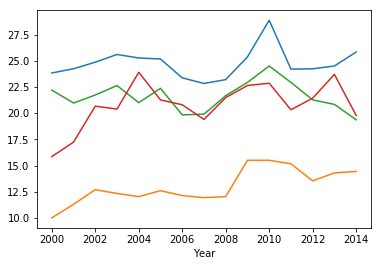

In [19]:
#preliminary graphs
#DY_gender1 = pd.DataFrame(disconnected_youth_gender.groupby(['Year', 'Sex'])['Percentage'].mean())
#DY_gender1.unstack(level=-1).plot(kind='line')
#DY_race1 = pd.DataFrame(disconnected_youth_race_3.groupby(['Year', 'Race'])['Percentage'].mean())
#DY_race1.unstack(level=-1).plot(kind='line', legend=False)

In [13]:
#export dataframes to excel
#disconnected_youth_race_3.to_csv(r'C:\Users\Paola\Downloads\GroupProject_Team5-by-5-master\GroupProject_Team5-by-5-master\cleaning\Disconnected_Youth_Rate_by_Race.csv', index=None)
#disconnected_youth_gender.to_csv(r'C:\Users\Paola\Downloads\GroupProject_Team5-by-5-master\GroupProject_Team5-by-5-master\cleaning\Disconnected_Youth_Rate_by_Gender.csv', index=None)


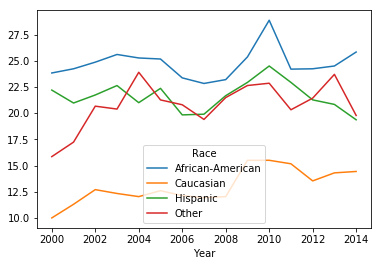

In [32]:
#Groupby per race and Year, then unstack to create Race columns and get percentages by year.
DY_race_2 = DY_race_1.groupby(['Year', 'Race'])
DY_race_3 = DY_race_2.mean().unstack(level=-1).stack(level=0)
DY_race_3.reset_index(level=0, inplace=True)
DY_race_3 = DY_race_3.set_index('Year')
DY_race_3.plot(kind='line')

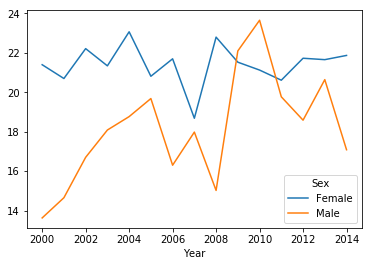

In [33]:
#Groupby per Gender and Year, then unstack to create Gender columns and get percentages by year.
DY_gender_2 = DY_gender_1.groupby(['Year', 'Sex'])
DY_gender_3 = DY_gender_2.mean().unstack(level=-1).stack(level=0)
DY_gender_3.reset_index(level=0, inplace=True)
DY_gender_3 = DY_gender_3.set_index('Year')
DY_gender_3.plot(kind='line')

In [31]:
#export dataframes to excel
#DY_gender_3.to_csv(r'C:\Users\Paola\Documents\GitHub\Project1 - output\CSV\Disconnected Youth Rate - GenderPercentage by Year.csv')
#DY_race_3.to_csv(r'C:\Users\Paola\Documents\GitHub\Project1 - output\CSV\Disconnected Youth Rate - RacePercentage by Year.csv')
